In [5]:
%run models.ipynb

In [6]:
df=pd.read_csv("preprocessing_done_with_budget.csv")

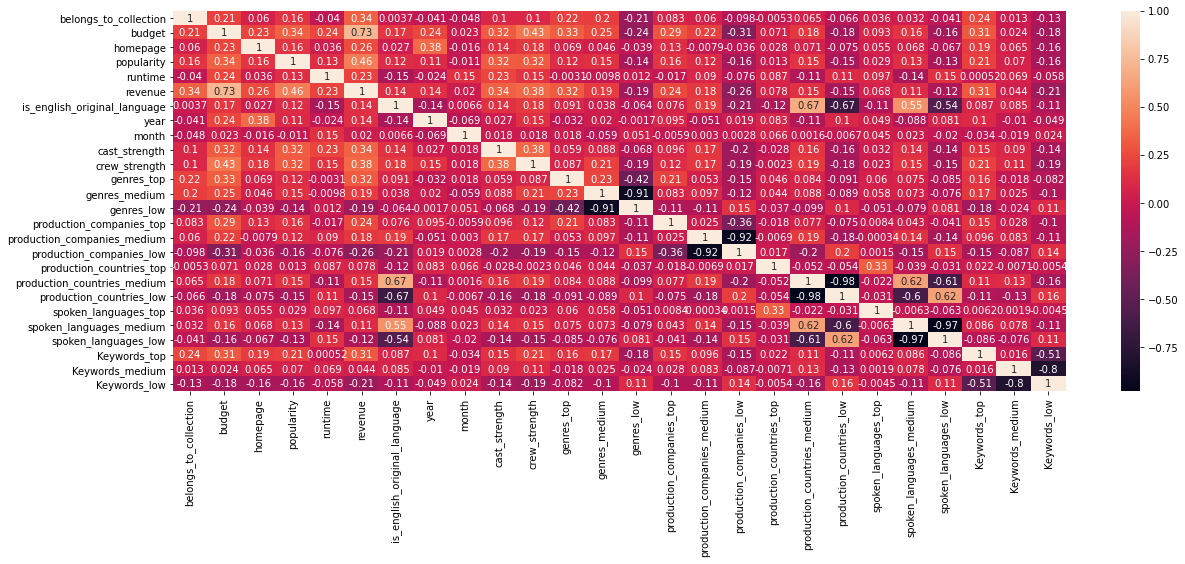

In [7]:
plt.figure(figsize=(20,7))

sns.heatmap(df.corr(),annot=True)

In [8]:
X=pd.get_dummies(df.drop(columns=["revenue"]))
y=np.log1p(df["revenue"])

# Random forest parameter Tuning without log transform of cols =["budget","popularity","runtime","cast_strength","crew_strength"]

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

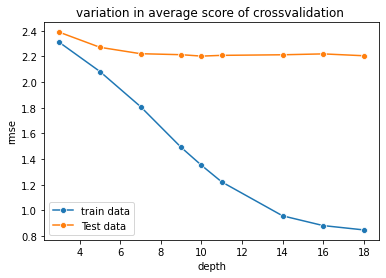

In [9]:
depth = [3,5,7,9,10,11,14,16,18]
train_score,test_score = [],[]
for i in depth:
    rd = RandomForestRegressor(max_depth=i)
    cv = cross_validate(rd,X,y,scoring=('neg_mean_squared_error'),cv=5,return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(depth,train_score,label="train data",marker='o')
sns.lineplot(depth,test_score,label="Test data",marker='o')
plt.xlabel("depth")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

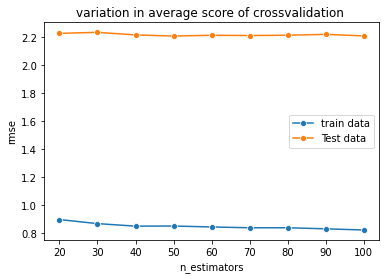

In [10]:
n_estimators = [20,30,40,50,60,70,80,90,100]
train_score,test_score = [],[]
for i in n_estimators:
    rd = RandomForestRegressor(n_estimators=i)
    cv = cross_validate(rd,X,y,scoring=('neg_mean_squared_error'),cv=5,return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(n_estimators,train_score,label="train data",marker='o')
sns.lineplot(n_estimators,test_score,label="Test data",marker='o')
plt.xlabel("n_estimators")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

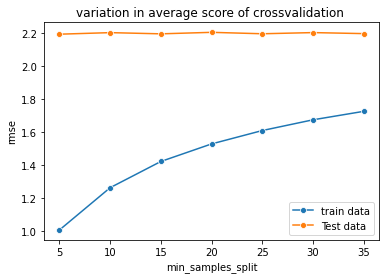

In [11]:
min_samples_split = [5,10,15,20,25,30,35]
train_score,test_score = [],[]
for i in min_samples_split:
    rd = RandomForestRegressor(min_samples_split=i)
    cv = cross_validate(rd,X,y,scoring=('neg_mean_squared_error'),cv=5,return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(min_samples_split,train_score,label="train data",marker='o')
sns.lineplot(min_samples_split,test_score,label="Test data",marker='o')
plt.xlabel("min_samples_split")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

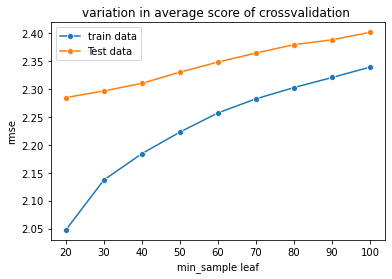

In [12]:
min_samples_leaf = [20,30,40,50,60,70,80,90,100]
train_score,test_score = [],[]
for i in min_samples_leaf:
    rd = RandomForestRegressor(min_samples_leaf=i)
    cv = cross_validate(rd,X,y,scoring=('neg_mean_squared_error'),cv=5,return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))
    
sns.lineplot(min_samples_leaf,train_score,label="train data",marker='o')
sns.lineplot(min_samples_leaf,test_score,label="Test data",marker='o')
plt.xlabel("min_sample leaf")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

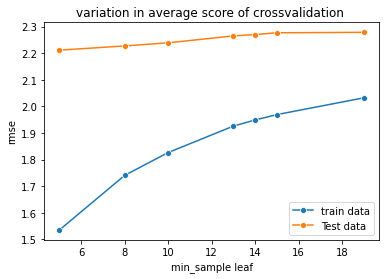

In [13]:
min_samples_leaf = [5,8,10,13,14,15,19]
train_score,test_score = [],[]
for i in min_samples_leaf:
    rd = RandomForestRegressor(min_samples_leaf=i)
    cv = cross_validate(rd,X,y,scoring=('neg_mean_squared_error'),cv=5,return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(min_samples_leaf,train_score,label="train data",marker='o')
sns.lineplot(min_samples_leaf,test_score,label="Test data",marker='o')
plt.xlabel("min_sample leaf")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

In [14]:
params={"max_depth": 5,
       "min_samples_leaf":8,
       "n_estimators":40}
rd = RandomForestRegressor(**params)
cv = cross_validate(rd,X,y,scoring=('neg_mean_squared_error'),cv=5,return_train_score=True)
print(np.sqrt(abs(cv["train_score"])))
print(np.sqrt(abs(cv["test_score"])))

[2.11035683 2.09454511 2.13633812 2.12575846 2.15743583]
[2.37304047 2.4125354  2.22446199 2.3134583  2.19202194]


In [15]:
rd.fit(X,y)

RandomForestRegressor(max_depth=5, min_samples_leaf=8, n_estimators=40)

In [16]:
[[rd.criterion],[rd.feature_importances_]]

[['mse'],
 [array([1.31573746e-02, 2.89687793e-01, 3.07925503e-04, 5.30182030e-01,
         3.71787637e-02, 0.00000000e+00, 4.39796044e-02, 3.06814679e-03,
         2.06428913e-02, 8.74711427e-03, 2.82425562e-03, 3.61739599e-04,
         1.06432332e-03, 0.00000000e+00, 2.57804272e-03, 3.46650499e-02,
         0.00000000e+00, 2.88674148e-04, 1.51506613e-03, 2.26123775e-05,
         1.06103232e-03, 1.11937273e-03, 1.53326742e-03, 4.54108106e-04,
         7.45550280e-04, 2.32643985e-03, 0.00000000e+00, 1.35377505e-03,
         0.00000000e+00, 0.00000000e+00, 1.13504732e-03, 0.00000000e+00])]]

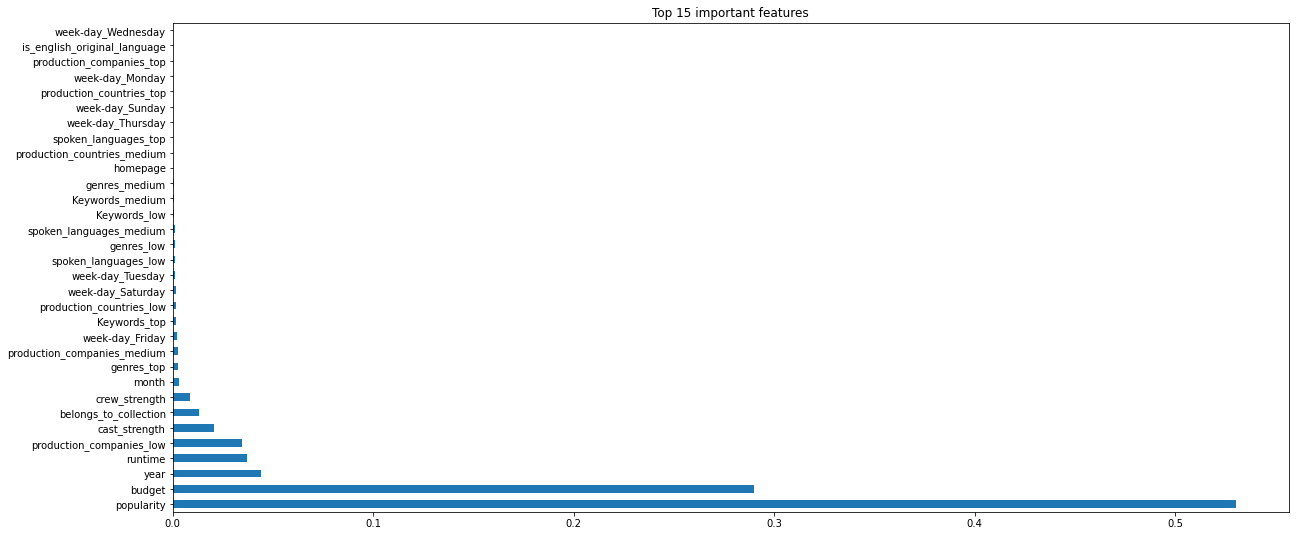

In [17]:
plt.figure(figsize=(20,9))
feat_importances = pd.Series(rd.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

In [18]:
feat = list(feat_importances.nlargest(15).index)

In [19]:
params={"max_depth": 6,
       "min_samples_leaf":15,
       "n_estimators":70}
rd = RandomForestRegressor(**params)
cv = cross_validate(rd,X[feat],y,scoring=('neg_mean_squared_error'),cv=5,return_train_score=True)
print(np.sqrt(abs(cv["train_score"])))
print(np.sqrt(abs(cv["test_score"])))
# print(cv)

[2.08583485 2.07232964 2.12227085 2.09356944 2.14600668]
[2.3720787  2.41255064 2.21747597 2.35142136 2.13798495]


# Random forest parameter Tuning with log 

In [20]:
X_log = df.copy()

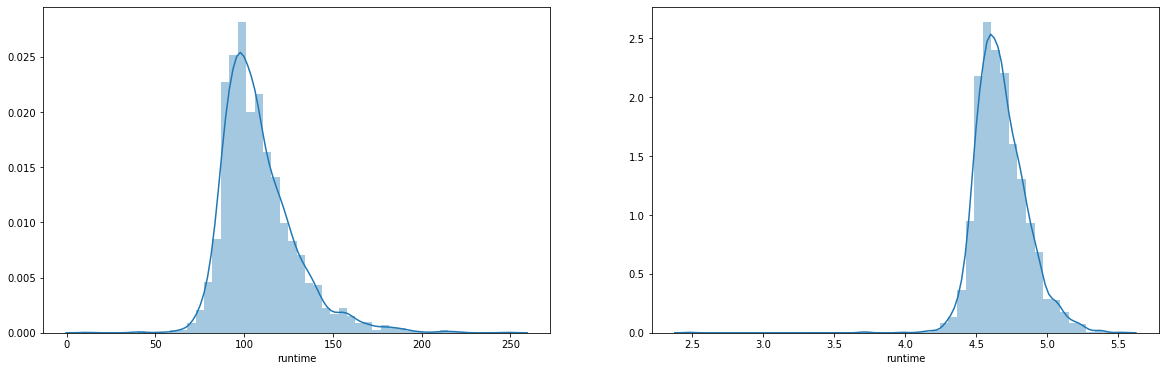

In [21]:
f,axes =plt.subplots(1,2,figsize=(20,6))
sns.distplot(X_log["runtime"],ax=axes[0])
sns.distplot(np.log1p(X_log["runtime"]),ax=axes[1])

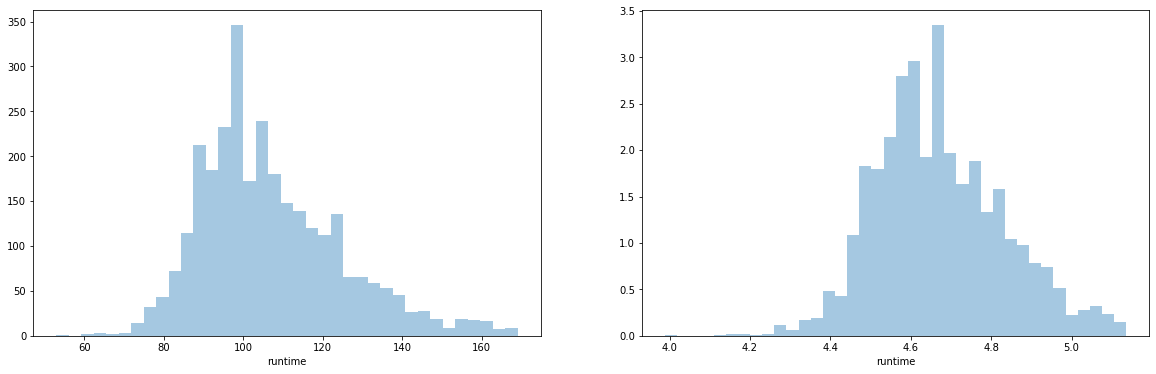

In [22]:
f,axes =plt.subplots(1,2,figsize=(20,6))
sns.distplot(remove_outlier(X_log,"runtime")["runtime"],ax=axes[0],kde=False)
sns.distplot(np.log1p(remove_outlier(X_log,"runtime")["runtime"]),ax=axes[1],kde=False,norm_hist=True)

In [23]:
X_log=remove_outlier(X_log,"runtime")

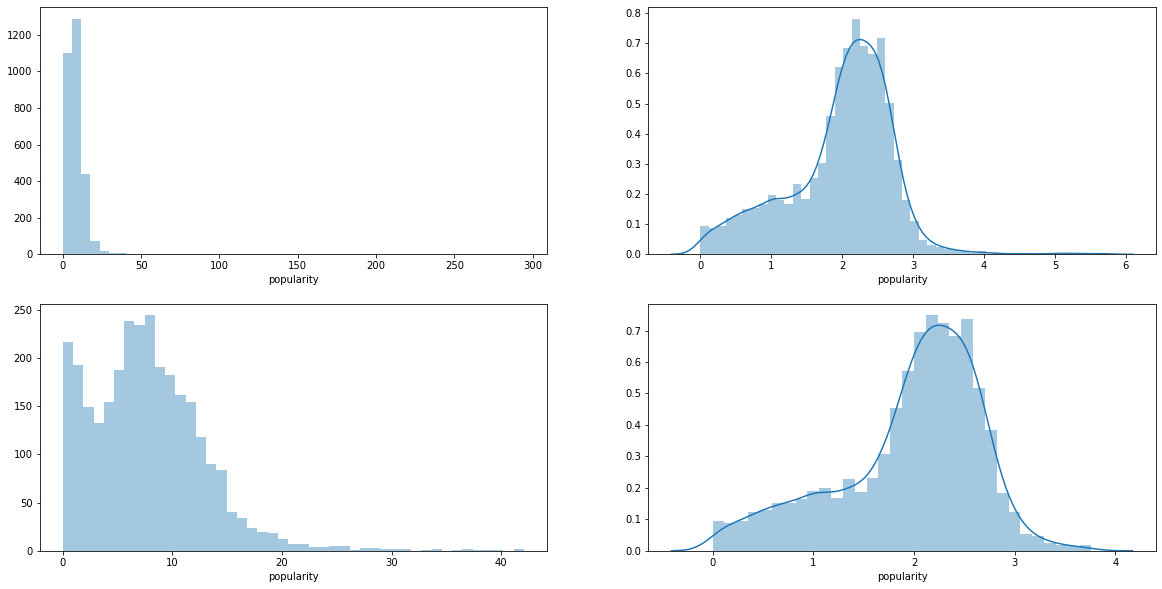

In [24]:
f,axes =plt.subplots(2,2,figsize=(20,10))
sns.distplot(X_log["popularity"],ax=axes[0][0],kde=False)
sns.distplot(np.log1p(X_log["popularity"]),ax=axes[0][1])
sns.distplot(remove_outlier(X_log,"popularity")["popularity"],ax=axes[1][0],kde=False)
sns.distplot(np.log1p(remove_outlier(X_log,"popularity")["popularity"]),ax=axes[1][1],norm_hist=True)

In [25]:
X_log=remove_outlier(X_log,"popularity")

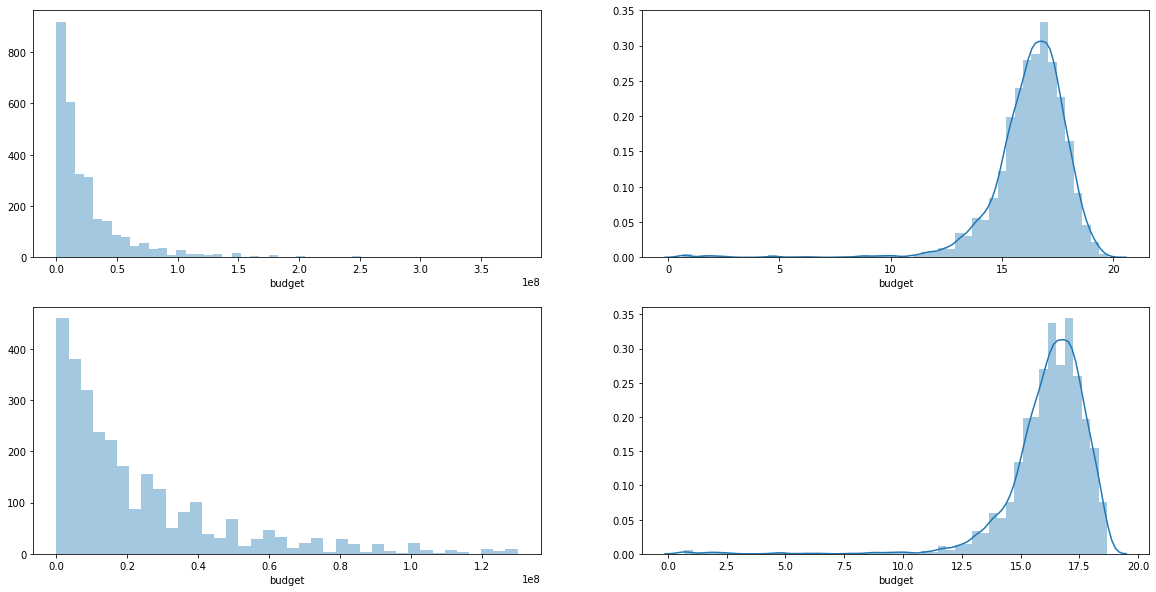

In [26]:
f,axes =plt.subplots(2,2,figsize=(20,10))
sns.distplot(X_log["budget"],ax=axes[0][0],kde=False)
sns.distplot(np.log1p(X_log["budget"]),ax=axes[0][1])
sns.distplot(remove_outlier(X_log,"budget")["budget"],ax=axes[1][0],kde=False)
sns.distplot(np.log1p(remove_outlier(X_log,"budget")["budget"]),ax=axes[1][1],norm_hist=True)

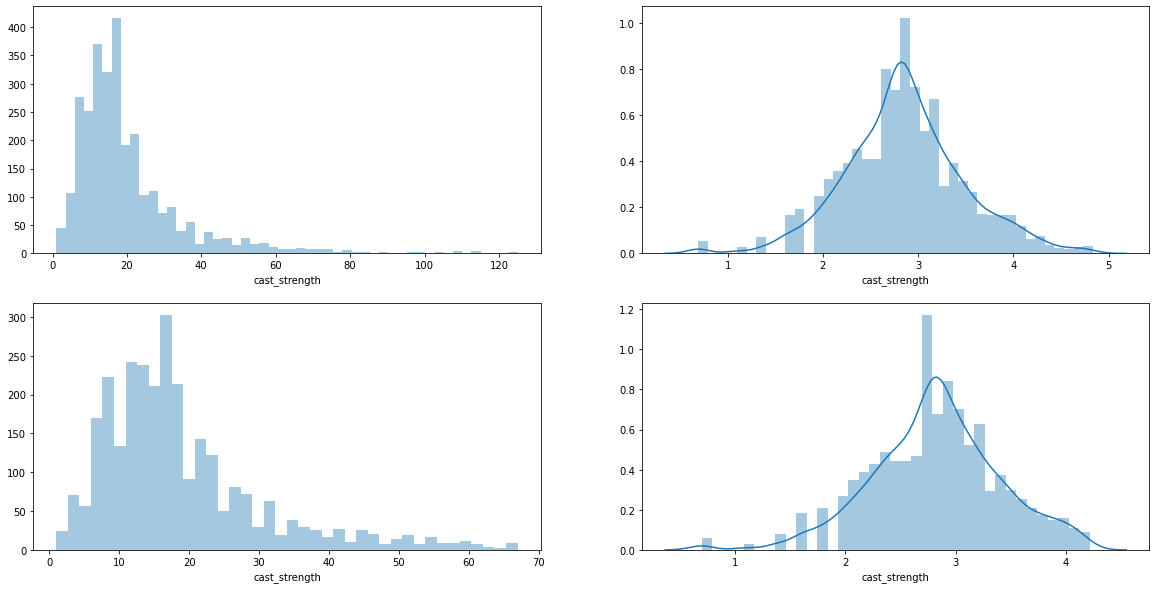

In [27]:
f,axes =plt.subplots(2,2,figsize=(20,10))
sns.distplot(X_log["cast_strength"],ax=axes[0][0],kde=False)
sns.distplot(np.log1p(X_log["cast_strength"]),ax=axes[0][1])
sns.distplot(remove_outlier(X_log,"cast_strength")["cast_strength"],ax=axes[1][0],kde=False)
sns.distplot(np.log1p(remove_outlier(X_log,"cast_strength")["cast_strength"]),ax=axes[1][1],norm_hist=True)

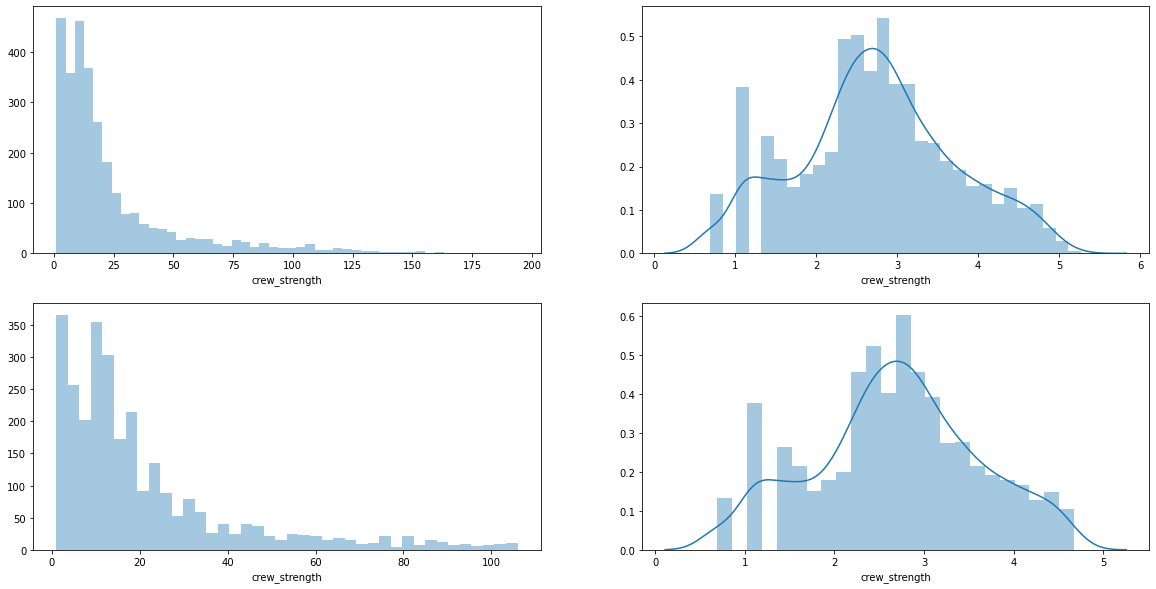

In [28]:
f,axes =plt.subplots(2,2,figsize=(20,10))
sns.distplot(X_log["crew_strength"],ax=axes[0][0],kde=False)
sns.distplot(np.log1p(X_log["crew_strength"]),ax=axes[0][1])
sns.distplot(remove_outlier(X_log,"crew_strength")["crew_strength"],ax=axes[1][0],kde=False)
sns.distplot(np.log1p(remove_outlier(X_log,"crew_strength")["crew_strength"]),ax=axes[1][1],norm_hist=True)

In [29]:
cols=["budget","popularity","runtime","cast_strength","crew_strength"]
for ele in cols:
    X_log[ele]=np.log1p(X_log[ele])

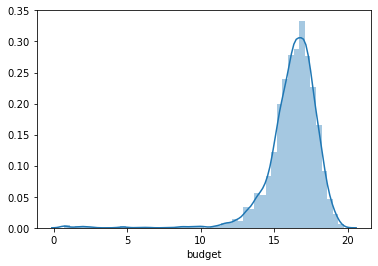

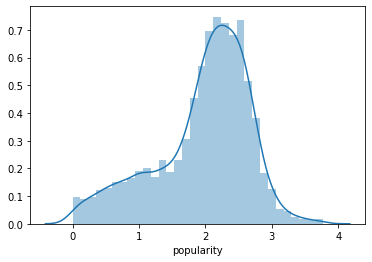

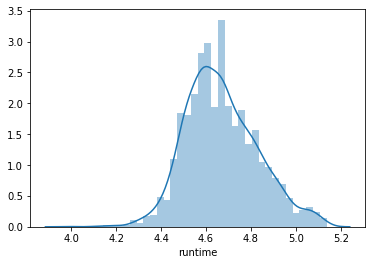

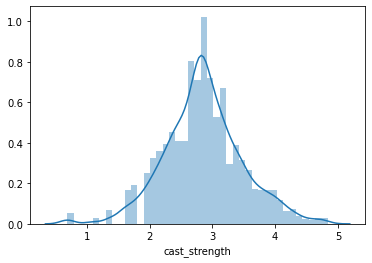

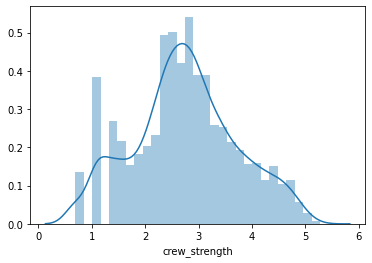

In [30]:
for ele in cols:
    sns.distplot(X_log[ele])
    plt.show()

In [31]:
y_log=np.log1p(X_log["revenue"])
X_log.drop(columns=["revenue"],inplace=True)
X_log= pd.get_dummies(X_log)

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

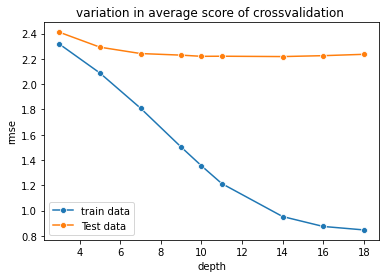

In [32]:
depth = [3,5,7,9,10,11,14,16,18]
train_score,test_score = [],[]
for i in depth:
    rd = RandomForestRegressor(max_depth=i)
    cv = cross_validate(rd,X_log,y_log,scoring=('neg_mean_squared_error'),cv=5,return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(depth,train_score,label="train data",marker='o')
sns.lineplot(depth,test_score,label="Test data",marker='o')
plt.xlabel("depth")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

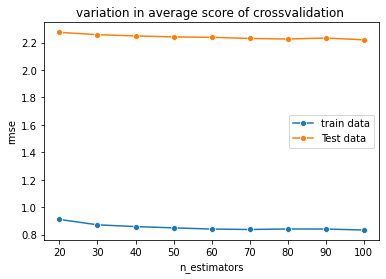

In [33]:
n_estimators = [20,30,40,50,60,70,80,90,100]
train_score,test_score = [],[]
for i in n_estimators:
    rd = RandomForestRegressor(n_estimators=i)
    cv = cross_validate(rd,X_log,y_log,scoring=('neg_mean_squared_error'),cv=5,return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(n_estimators,train_score,label="train data",marker='o')
sns.lineplot(n_estimators,test_score,label="Test data",marker='o')
plt.xlabel("n_estimators")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

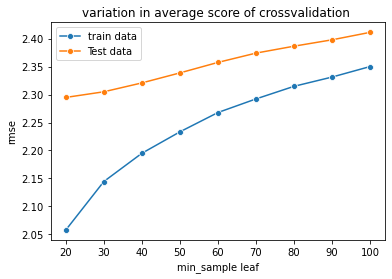

In [34]:
min_samples_leaf = [20,30,40,50,60,70,80,90,100]
train_score,test_score = [],[]
for i in min_samples_leaf:
    rd = RandomForestRegressor(min_samples_leaf=i)
    cv = cross_validate(rd,X_log,y_log,scoring=('neg_mean_squared_error'),cv=5,return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(min_samples_leaf,train_score,label="train data",marker='o')
sns.lineplot(min_samples_leaf,test_score,label="Test data",marker='o')
plt.xlabel("min_sample leaf")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

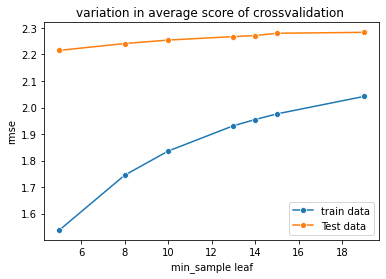

In [35]:
min_samples_leaf = [5,8,10,13,14,15,19]
train_score,test_score = [],[]
for i in min_samples_leaf:
    rd = RandomForestRegressor(min_samples_leaf=i)
    cv = cross_validate(rd,X_log,y_log,scoring=('neg_mean_squared_error'),cv=5,return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(min_samples_leaf,train_score,label="train data",marker='o')
sns.lineplot(min_samples_leaf,test_score,label="Test data",marker='o')
plt.xlabel("min_sample leaf")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

In [36]:
params={"max_depth": 5,
       "min_samples_leaf":19,
       "n_estimators":80}
rd = RandomForestRegressor(**params)
cv = cross_validate(rd,X_log,y_log,scoring=('neg_mean_squared_error'),cv=5,return_train_score=True)
print(np.sqrt(abs(cv["train_score"])))
print(np.sqrt(abs(cv["test_score"])))

[2.16295652 2.15865994 2.20050306 2.16448445 2.22981807]
[2.41734713 2.42039031 2.25596613 2.41795381 2.12027438]


Text(0.5, 1.0, 'variation in average score of crossvalidation ')

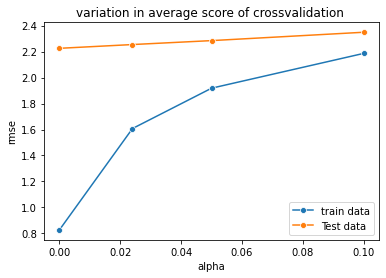

In [37]:
alpha = [0,0.024,0.05,0.1]
train_score,test_score = [],[]
for i in alpha:
    rd = RandomForestRegressor(ccp_alpha=i)
    cv = cross_validate(rd,X_log,y_log,scoring=('neg_mean_squared_error'),cv=5,return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(alpha,train_score,label="train data",marker='o')
sns.lineplot(alpha,test_score,label="Test data",marker='o')
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

# random Forest Hyperparameter tuning

In [107]:
random_grid_forest = {"max_depth": [3,5,7,8],
       "min_samples_leaf":[14,17,19,24,20],
       "n_estimators":[70,75,80,85,90],
        "ccp_alpha" : [0,0.024,0.05,0.1],
        "min_samples_split" :[5,10,15,20,25,30,35]
        }

In [108]:
rd = random_forest_randomized_search(X,y,random_grid_forest,400)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.4min finished


In [109]:
res_df = pd.DataFrame(rd.cv_results_)

In [110]:
res_df["avg_train_score"]=np.sqrt(abs((res_df["split0_train_score"]+res_df["split1_train_score"]+res_df["split2_train_score"])/3))
res_df["avg_test_score"]=np.sqrt(abs((res_df["split0_test_score"]+res_df["split1_test_score"]+res_df["split2_test_score"])/3))

In [111]:
res_df["avg_test_score"].min(),res_df["avg_train_score"].min()

(2.2631771145805297, 1.996386415937403)

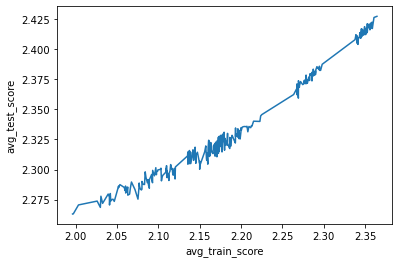

In [118]:
sns.lineplot(res_df["avg_train_score"],res_df["avg_test_score"])

In [114]:
res_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_depth', 'param_ccp_alpha',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score', 'avg_train_score',
       'avg_test_score'],
      dtype='object')

In [115]:
columns_df=['param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_depth', 'param_ccp_alpha','avg_train_score',
       'avg_test_score']

In [119]:

import hiplot as hip
# cols=["param_num_leaves","param_min_data_in_leaf","param_max_depth","avg_train_score","avg_test_score"]
hip.Experiment.from_dataframe(res_df[columns_df]).display()
plt.show()

<IPython.core.display.Javascript object>

In [45]:
params={"max_depth": 40,
       "min_samples_leaf":19,
       "n_estimators":90}
X_train,X_test,y_train,y_test=train_test_split(X_log,y_log,test_size=0.3,random_state=14)
rf = RandomForestRegressor(**params)
#     print("hurrah")
rf.fit(X_train,y_train)
print("Random forest with deafault parameters")
print(" Score : ",rf.score(X_test,y_test))
print("mean squared log error Training Dataset: ",np.sqrt(mean_squared_error( y_train, rf.predict(X_train) )))
print("mean squared log error Testing Dataset: ",np.sqrt(mean_squared_error( y_test, rf.predict(X_test) )))
    

Random forest with deafault parameters
 Score :  0.45418372557816256
mean squared log error Training Dataset:  2.0288450492758945
mean squared log error Testing Dataset:  2.3348628053190774


# xgboost training 

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

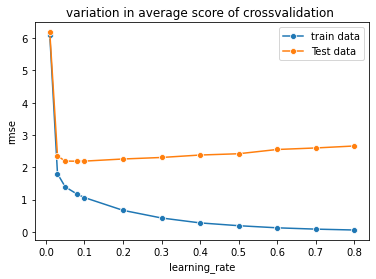

In [46]:
#exponential
learning_rate = [0.01,0.03,0.05,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
train_score,test_score = [],[]
for i in learning_rate:
    xgb_model = xgb.XGBRegressor(learning_rate=i)
    cv = cross_validate(xgb_model,X_log,y_log,cv=5,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(learning_rate,train_score,label="train data",marker='o')
sns.lineplot(learning_rate,test_score,label="Test data",marker='o')
plt.xlabel("learning_rate")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

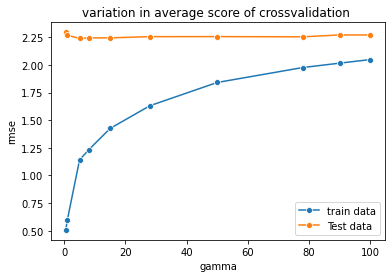

In [47]:
gamma = [0.5,1,5,8,15,28,50,78,90,100]
train_score,test_score = [],[]
for i in gamma:
    xgb_model = xgb.XGBRegressor(gamma=i)
    cv = cross_validate(xgb_model,X_log,y_log,cv=5,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(gamma,train_score,label="train data",marker='o')
sns.lineplot(gamma,test_score,label="Test data",marker='o')
plt.xlabel("gamma")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

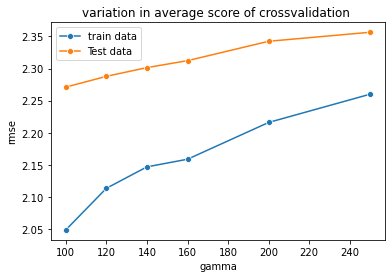

In [48]:
gamma = [100,120,140,160,200,250]
train_score,test_score = [],[]
for i in gamma:
    xgb_model = xgb.XGBRegressor(gamma=i)
    cv = cross_validate(xgb_model,X_log,y_log,cv=5,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(gamma,train_score,label="train data",marker='o')
sns.lineplot(gamma,test_score,label="Test data",marker='o')
plt.xlabel("gamma")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

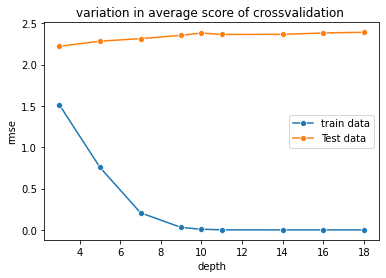

In [49]:
depth = [3,5,7,9,10,11,14,16,18]
train_score,test_score = [],[]
for i in depth:
    xgb_model = xgb.XGBRegressor(max_depth=i)
    cv = cross_validate(xgb_model,X_log,y_log,cv=5,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(depth,train_score,label="train data",marker='o')
sns.lineplot(depth,test_score,label="Test data",marker='o')
plt.xlabel("depth")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

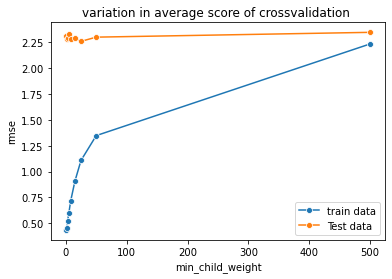

In [50]:
min_child_weight  = [0,1,2,3,5,8,15,25,50,500]
train_score,test_score = [],[]
for i in min_child_weight:
    xgb_model = xgb.XGBRegressor(min_child_weight=i)
    cv = cross_validate(xgb_model,X_log,y_log,cv=5,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(min_child_weight,train_score,label="train data",marker='o')
sns.lineplot(min_child_weight,test_score,label="Test data",marker='o')
plt.xlabel("min_child_weight")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

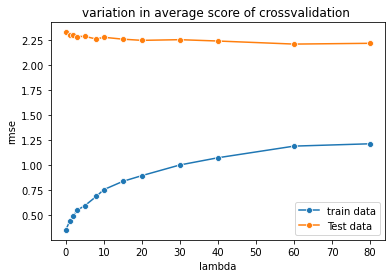

In [51]:
 
lamba  = [0,1,2,3,5,8,10,15,20,30,40,60,80]
train_score,test_score = [],[]
for i in lamba:
    xgb_model = xgb.XGBRegressor(reg_lambda =i)
    cv = cross_validate(xgb_model,X_log,y_log,cv=5,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(lamba,train_score,label="train data",marker='o')
sns.lineplot(lamba,test_score,label="Test data",marker='o')
plt.xlabel("lambda")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

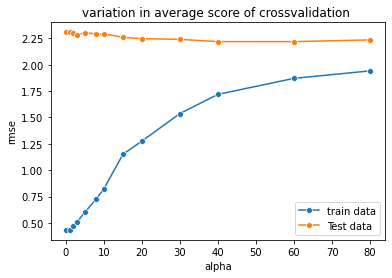

In [52]:
alpha  = [0,1,2,3,5,8,10,15,20,30,40,60,80]
train_score,test_score = [],[]
for i in lamba:
    xgb_model = xgb.XGBRegressor(reg_alpha =i)
    cv = cross_validate(xgb_model,X_log,y_log,cv=5,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(alpha,train_score,label="train data",marker='o')
sns.lineplot(alpha,test_score,label="Test data",marker='o')
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

# xgboost hyperparameter tuning

In [53]:
xgboost_hyperparameters ={
    "learning_rate" : [0.025,0.03,0.04,0.05,0.06],
    "gamma" : [78,80,85,88,90,95,100],
    "max_depth" : [2,3,4,5,6,7],
    "reg_lambda"  : [78,80,85,88,90,95,100]
}

# xgboost_hyperparameters ={
#     "learning_rate" : [0.01,0.03,0.05,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],
#     "gamma" : [0.5,1,5,8,15,28,50,78,90,100],
#     "max_depth" : [3,5,7,9,10,11,14,16,18],
#     "reg_lambda"  : [0,1,2,3,5,8,10,15,20,30,40,60,80]
# }


    

    

In [54]:
xgb_m = xgb_randomized_search(X,y,xgboost_hyperparameters,400)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.4min finished


In [55]:
res_xgb = pd.DataFrame(xgb_m.cv_results_)

In [56]:
res_xgb["avg_train_score"]=np.sqrt(abs((res_xgb["split0_train_score"]+res_xgb["split1_train_score"]+res_xgb["split2_train_score"])/3))
res_xgb["avg_test_score"]=np.sqrt(abs((res_xgb["split0_test_score"]+res_xgb["split1_test_score"]+res_xgb["split2_test_score"])/3))

In [57]:
res_xgb["avg_test_score"].min(),res_xgb["avg_train_score"].min()

(2.260105257043555, 2.1418672569222585)

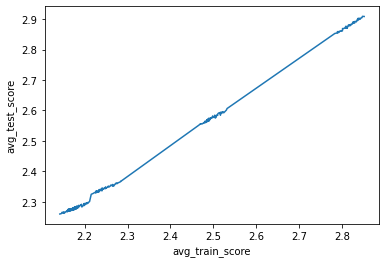

In [58]:
sns.lineplot(res_xgb["avg_train_score"],res_xgb["avg_test_score"])

In [59]:
xgb_m.best_params_

{'reg_lambda': 80, 'max_depth': 7, 'learning_rate': 0.06, 'gamma': 78}

In [60]:
# xgb_final = xgb.XGBRegressor(**({'reg_lambda': 15, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 8}))
xgb_final = xgb.XGBRegressor(**({'reg_lambda': 80, 'max_depth': 7, 'learning_rate': 0.06, 'gamma': 78}))

In [61]:
test=pd.read_csv("test_after_preprocesing.csv")


In [62]:
test=pd.get_dummies(test)

In [63]:
xgb_final.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=78, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.06, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=80, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
res_xgb_test = xgb_final.predict(test)

In [65]:
sub = pd.read_csv("sample_submission.csv")
sub["revenue"]=np.expm1(res_xgb_test)
sub.to_csv("xgb_final_sub.csv",index=False)

In [66]:
xgb_final.feature_importances_

array([0.09382407, 0.15859494, 0.        , 0.12026138, 0.04963043,
       0.03993395, 0.0449906 , 0.02600937, 0.07277099, 0.04000739,
       0.05871853, 0.        , 0.        , 0.        , 0.        ,
       0.09408645, 0.        , 0.        , 0.03965204, 0.        ,
       0.05527439, 0.03230322, 0.        , 0.        , 0.04070852,
       0.        , 0.        , 0.03323362, 0.        , 0.        ,
       0.        , 0.        ], dtype=float32)

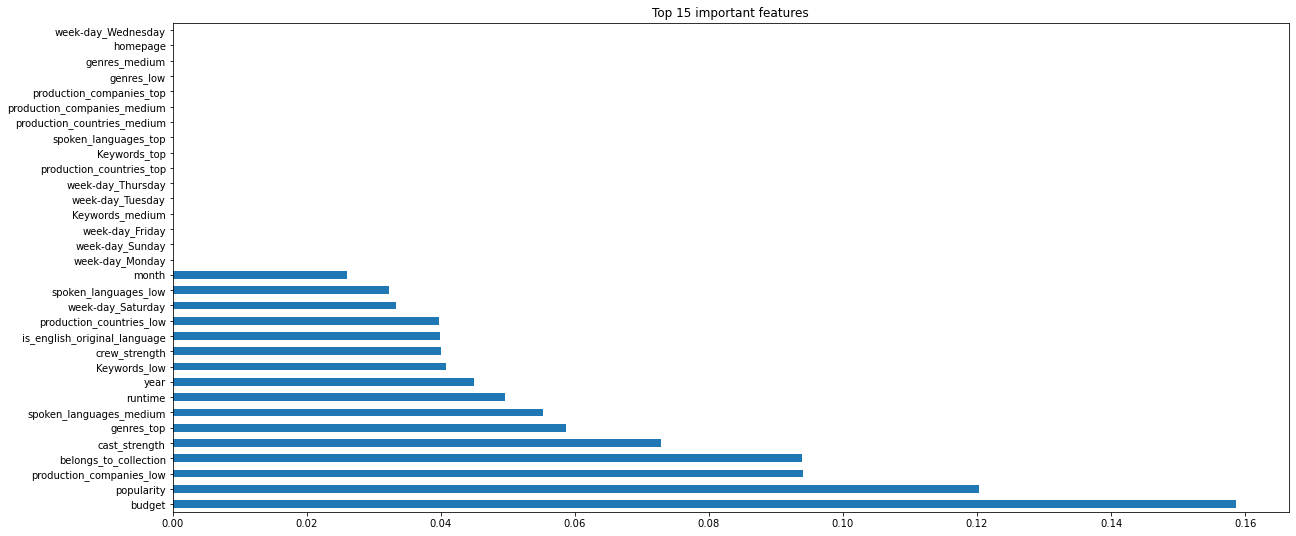

In [67]:
plt.figure(figsize=(20,9))
feat_importances = pd.Series(xgb_final.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

# lightgbm

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

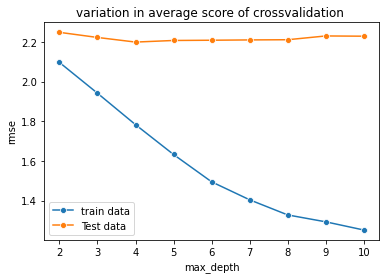

In [68]:
max_depth = [2,3,4,5,6,7,8,9,10]
# max_depth = [10,12,14,16,18]

train_score,test_score = [],[]
for i in max_depth:
    lgb_model = lgb.LGBMRegressor(max_depth=i)
    cv = cross_validate(lgb_model,X_log,y_log,cv=5,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(max_depth,train_score,label="train data",marker='o')
sns.lineplot(max_depth,test_score,label="Test data",marker='o')
plt.xlabel("max_depth")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

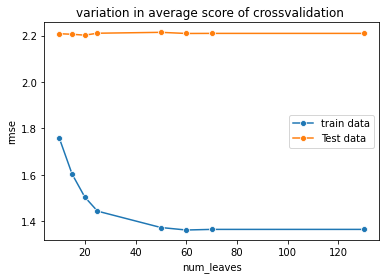

In [69]:
num_leaves = []
num_leaves = [10,15,20,25,50,60,70,130]

train_score,test_score = [],[]
for i in num_leaves:
    lgb_model = lgb.LGBMRegressor(max_depth=7,num_leaves=i)
    cv = cross_validate(lgb_model,X_log,y_log,cv=5,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(num_leaves,train_score,label="train data",marker='o')
sns.lineplot(num_leaves,test_score,label="Test data",marker='o')
plt.xlabel("num_leaves")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min

Text(0.5, 1.0, 'variation in average score of crossvalidation ')

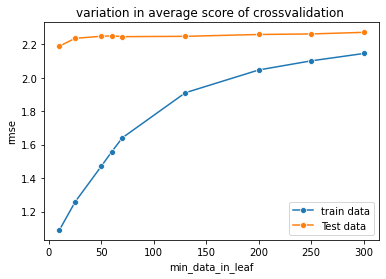

In [70]:

min_data_in_leaf = [10,25,50,60,70,130,200,250,300]

train_score,test_score = [],[]
for i in min_data_in_leaf:
    lgb_model = lgb.LGBMRegressor(min_data_in_leaf=i)
    cv = cross_validate(lgb_model,X_log,y_log,cv=5,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(min_data_in_leaf,train_score,label="train data",marker='o')
sns.lineplot(min_data_in_leaf,test_score,label="Test data",marker='o')
plt.xlabel("min_data_in_leaf")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

In [71]:
lgb_hyperparameters ={
    "min_data_in_leaf" :[10,25,50,60,70,130,200,250,300],
    "num_leaves" : [10,15,20,25,50,60,70,130],
    "max_depth" : [2,3,4,5,6,7]
}

# lgb_hyperparameters ={
#     "min_data_in_leaf" :[250,300,350,375,400],
#     "num_leaves" : [5,10,15,20,25,30],
#     "max_depth" : [2,3,4,5,6,7]
# }

    

    

In [72]:
lgb_m = lgb_randomized_search(X,y,lgb_hyperparameters,400)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.2min


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 978
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 32
[LightGBM] [Info] Start training from score 15.961986


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.4min finished


In [73]:
res_lgb = pd.DataFrame(lgb_m.cv_results_)

In [74]:
res_lgb["avg_train_score"]=np.sqrt(abs((res_lgb["split0_train_score"]+res_lgb["split1_train_score"]+res_lgb["split2_train_score"])/3))
res_lgb["avg_test_score"]=np.sqrt(abs((res_lgb["split0_test_score"]+res_lgb["split1_test_score"]+res_lgb["split2_test_score"])/3))

In [90]:
res_lgb.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_num_leaves,param_min_data_in_leaf,param_max_depth,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score,avg_train_score,avg_test_score
0,0.368678,0.014372,0.011458,0.000445,50,25,3,"{'num_leaves': 50, 'min_data_in_leaf': 25, 'ma...",-5.253429,-5.103328,...,-4.957535,0.318275,69,-3.740066,-3.709792,-3.932313,-3.794057,0.098540,1.947834,2.226552
1,0.246694,0.011586,0.014541,0.002285,70,250,3,"{'num_leaves': 70, 'min_data_in_leaf': 250, 'm...",-5.223973,-5.498514,...,-5.188290,0.269050,331,-4.582120,-4.458364,-4.786115,-4.608866,0.135134,2.146827,2.277782
2,0.383596,0.035172,0.011739,0.001132,10,250,7,"{'num_leaves': 10, 'min_data_in_leaf': 250, 'm...",-5.225983,-5.476910,...,-5.174808,0.269993,300,-4.408911,-4.313439,-4.613006,-4.445118,0.124949,2.108345,2.274820
3,0.274090,0.011748,0.010508,0.000138,130,50,2,"{'num_leaves': 130, 'min_data_in_leaf': 50, 'm...",-5.323492,-5.383225,...,-5.165666,0.266555,284,-4.441361,-4.393009,-4.698251,-4.510874,0.133958,2.123882,2.272810
4,0.504089,0.007049,0.013612,0.000748,15,25,4,"{'num_leaves': 15, 'min_data_in_leaf': 25, 'ma...",-5.209593,-5.078316,...,-4.952391,0.276162,68,-3.178884,-3.153681,-3.380257,-3.237607,0.101392,1.799335,2.225397


In [97]:
cols=["param_num_leaves","param_min_data_in_leaf","param_max_depth"]
ans = res_lgb[cols].to_dict()

In [106]:

import hiplot as hip
cols=["param_num_leaves","param_min_data_in_leaf","param_max_depth","avg_train_score","avg_test_score"]
hip.Experiment.from_dataframe(res_lgb[cols]).display()
plt.show()

<IPython.core.display.Javascript object>

In [75]:
res_lgb["avg_test_score"].min(),res_lgb["avg_train_score"].min()

(2.172568457730975, 1.0753998513963319)

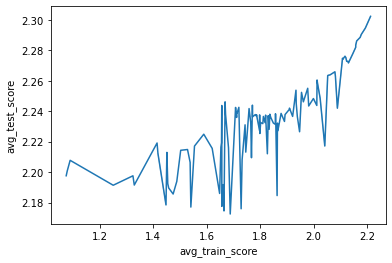

In [76]:
sns.lineplot(res_lgb["avg_train_score"],res_lgb["avg_test_score"])

In [77]:
lgb_m.best_params_

{'num_leaves': 10, 'min_data_in_leaf': 10, 'max_depth': 5}

In [78]:
lgb_final = lgb.LGBMRegressor(**({'num_leaves': 10, 'min_data_in_leaf': 10, 'max_depth': 5}))
# lgb_final = lgb.LGBMRegressor(**({'num_leaves': 10, 'min_data_in_leaf': 250, 'max_depth': 5}))

In [79]:
test=pd.read_csv("test_after_preprocesing.csv")


In [80]:
test=pd.get_dummies(test)

In [81]:
lgb_final.fit(X,y)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


LGBMRegressor(max_depth=5, min_data_in_leaf=10, num_leaves=10)

In [82]:
res_lgb_test = lgb_final.predict(test)

In [83]:
sub = pd.read_csv("sample_submission.csv")
sub["revenue"]=np.expm1(res_lgb_test)
sub.to_csv("lgb_final_sub.csv",index=False)

In [84]:
lgb_final.feature_importances_

array([ 21, 133,  14, 149,  91,  27, 132,  67,  45,  62,  18,  19,   3,
         0,   1,  23,   2,   6,   4,   5,   7,  16,   4,   0,  12,   4,
         3,  14,   5,   1,   6,   6])

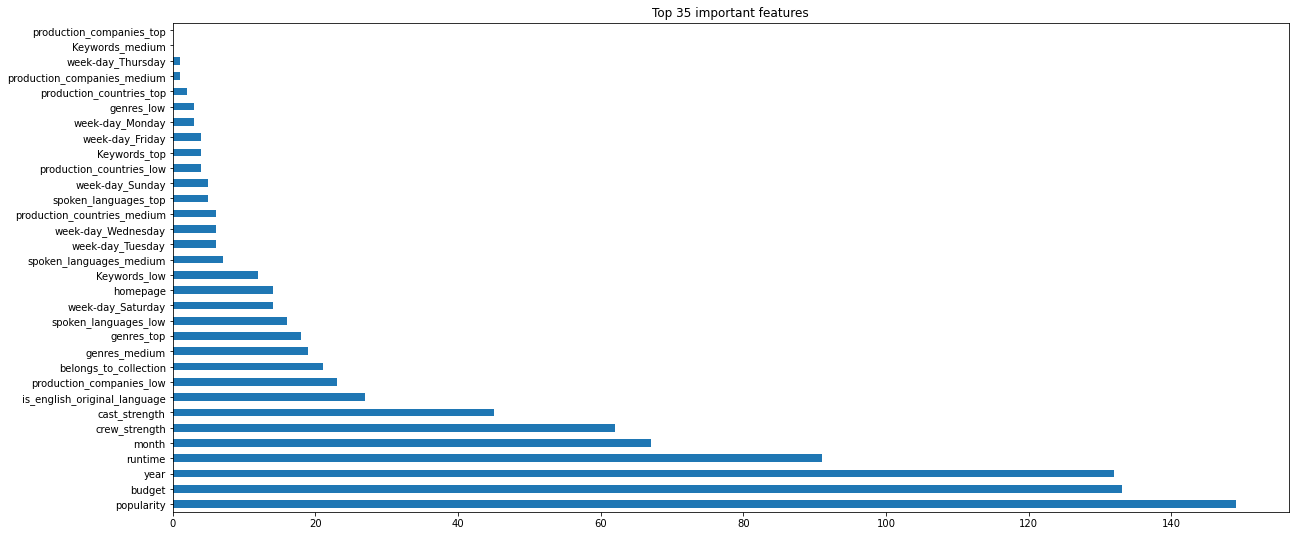

In [85]:
plt.figure(figsize=(20,9))
feat_importances = pd.Series(lgb_final.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.title("Top 35 important features")
plt.show()

In [86]:
X.columns


Index(['belongs_to_collection', 'budget', 'homepage', 'popularity', 'runtime',
       'is_english_original_language', 'year', 'month', 'cast_strength',
       'crew_strength', 'genres_top', 'genres_medium', 'genres_low',
       'production_companies_top', 'production_companies_medium',
       'production_companies_low', 'production_countries_top',
       'production_countries_medium', 'production_countries_low',
       'spoken_languages_top', 'spoken_languages_medium',
       'spoken_languages_low', 'Keywords_top', 'Keywords_medium',
       'Keywords_low', 'week-day_Friday', 'week-day_Monday',
       'week-day_Saturday', 'week-day_Sunday', 'week-day_Thursday',
       'week-day_Tuesday', 'week-day_Wednesday'],
      dtype='object')

In [87]:
cat_features = [i for i in X.columns if i not in ["budget","popularity","runtime","crew_strength","cast_strength","year"]]

cat_features

['belongs_to_collection',
 'homepage',
 'is_english_original_language',
 'month',
 'genres_top',
 'genres_medium',
 'genres_low',
 'production_companies_top',
 'production_companies_medium',
 'production_companies_low',
 'production_countries_top',
 'production_countries_medium',
 'production_countries_low',
 'spoken_languages_top',
 'spoken_languages_medium',
 'spoken_languages_low',
 'Keywords_top',
 'Keywords_medium',
 'Keywords_low',
 'week-day_Friday',
 'week-day_Monday',
 'week-day_Saturday',
 'week-day_Sunday',
 'week-day_Thursday',
 'week-day_Tuesday',
 'week-day_Wednesday']

C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarnin

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] 

C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] 

C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\piyushgupta04\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


Text(0.5, 1.0, 'variation in average score of crossvalidation ')

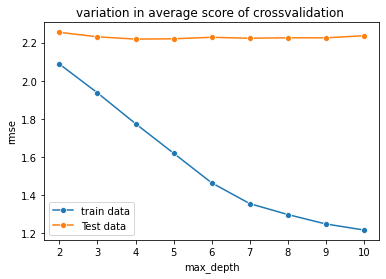

In [88]:
max_depth = [2,3,4,5,6,7,8,9,10]
# max_depth = [10,12,14,16,18]
dicta ={
    "categorical_feature":cat_features
}
train_score,test_score = [],[]
for i in max_depth:
    lgb_model = lgb.LGBMRegressor(max_depth=i)
    cv = cross_validate(lgb_model,X_log,y_log,cv=5,fit_params=dicta,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.sqrt(abs(cv["train_score"].mean())))
    test_score.append(np.sqrt(abs(cv["test_score"].mean())))

sns.lineplot(max_depth,train_score,label="train data",marker='o')
sns.lineplot(max_depth,test_score,label="Test data",marker='o')
plt.xlabel("max_depth")
plt.ylabel("rmse")
plt.title("variation in average score of crossvalidation ")

In [89]:

model_lgb = lgb.LGBMRegressor(silent=False)
lgb_rand=RandomizedSearchCV(estimator=model_lgb,param_distributions=lgb_hyperparameters,n_iter=200,cv=3,verbose=2,fit_params=dicta,
                               random_state=100,n_jobs=-1,scoring=('neg_mean_squared_error'),return_train_score=True)
lgb_rand.fit(X,y)

TypeError: __init__() got an unexpected keyword argument 'fit_params'

# catboost

In [ ]:
# learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6]
# sns.lineplot(learning_rate,train_score[1:],label="train data",marker='o')
# sns.lineplot(learning_rate,test_score[1:],label="Test data",marker='o')
# plt.xlabel("learning_rate")
# plt.ylabel("rmse")
# plt.title("variation in average score of crossvalidation ")

In [ ]:
# learning_rate = [0,0.1,0.2,0.3,0.4,0.5,0.6]
# # max_depth = [10,12,14,16,18]

# train_score,test_score = [],[]
# for i in learning_rate:
#     cb_model = cb.CatBoostRegressor(learning_rate=i)
#     cv = cross_validate(cb_model,X_log,y_log,cv=5,scoring=('neg_mean_squared_error'),return_train_score=True)
#     train_score.append(np.sqrt(abs(cv["train_score"].mean())))
#     test_score.append(np.sqrt(abs(cv["test_score"].mean())))

# sns.lineplot(learning_rate,train_score,label="train data",marker='o')
# sns.lineplot(learning_rate,test_score,label="Test data",marker='o')
# plt.xlabel("learning_rate")
# plt.ylabel("rmse")
# plt.title("variation in average score of crossvalidation ")